## Importando as bibliotecas

In [102]:
import pandas as pd
import seaborn as sns
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest
import statsmodels as sn
from scipy.stats import ttest_ind


In [25]:
tmdb = pd.read_csv("dados/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [26]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [27]:
tmdb.query('vote_average == 0')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 37, ""nam...",NaN,69382,[],en,The Legend of God's Gun,A gun-slinging preacher returns to the debauch...,0.003582,[],[],2007-07-08,0,78.0,[],Released,NaN,The Legend of God's Gun,0.0,0
4771,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,220490,[],en,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...",0.056459,[],[],2013-04-19,0,89.0,[],Released,NaN,Her Cry: La Llorona Investigation,0.0,0
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],[],2015-10-02,0,90.0,[],Released,NaN,Dutch Kills,0.0,0
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2014-09-05,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0


In [28]:
tmdb_com_mais_de_10_votos = tmdb.query('vote_count >= 10')
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


## Limpeza de dados da tabela

Foi realizada a limpeza de dados por conta dos outliers
(Filmes com menos de 10 votos, permitindo filmes com nota média 0 e 10, poluindo o estudo)

C:\Users\matheus.farina\AppData\Local\Temp\ipykernel_16692\3691630444.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, norm_hist= False, kde= False)


Text(0.5, 1.0, 'Média de votos em filmes no TMBD 5000')

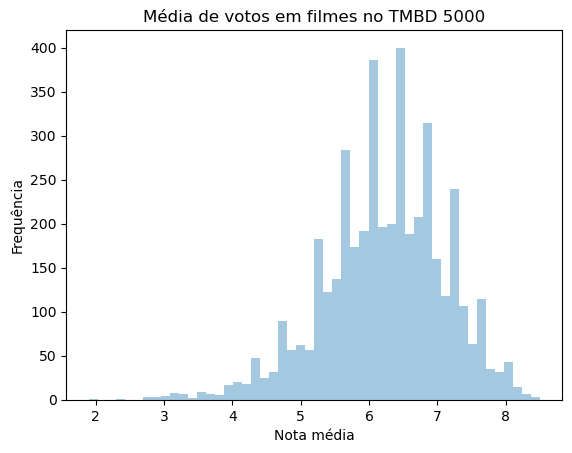

In [29]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, norm_hist= False, kde= False)
ax.set(xlabel='Nota média', ylabel='Frequência')
ax.set_title('Média de votos em filmes no TMBD 5000')

C:\Users\matheus.farina\AppData\Local\Temp\ipykernel_16692\3007096155.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)


Text(0.5, 1.0, 'Média de votos em filmes no TMBD 5000')

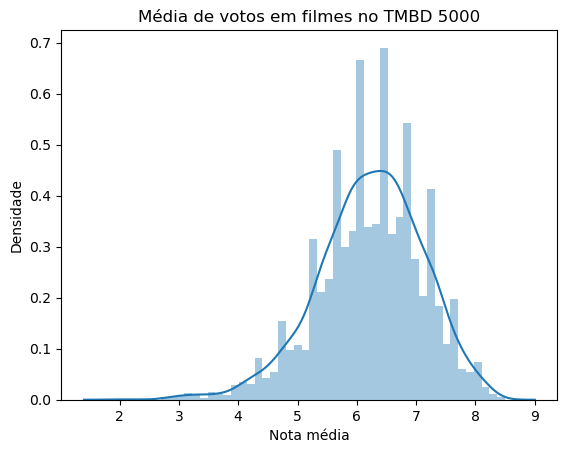

In [30]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no TMBD 5000')

Text(0.5, 1.0, 'Média de votos em filmes no TMBD 5000')

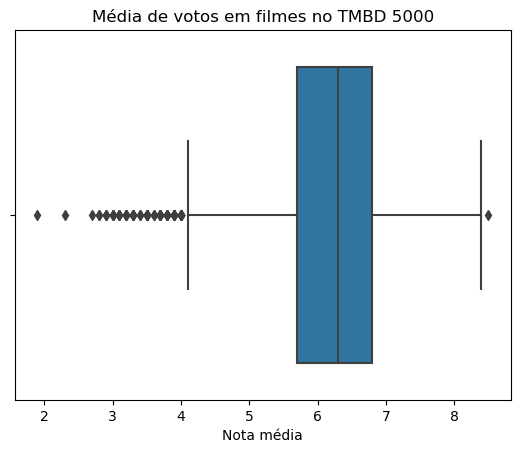

In [31]:
ax = sns.boxplot(x=tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel='Nota média')
ax.set_title('Média de votos em filmes no TMBD 5000')

# Análise do Movielens

In [32]:
notas = pd.read_csv("dados/ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [33]:
nota_media = notas.groupby("movieId").mean()["rating"]
nota_media.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

C:\Users\matheus.farina\AppData\Local\Temp\ipykernel_16692\3464610312.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(nota_media.values)


Text(0.5, 1.0, 'Média de votos em filmes do Movielens 100k')

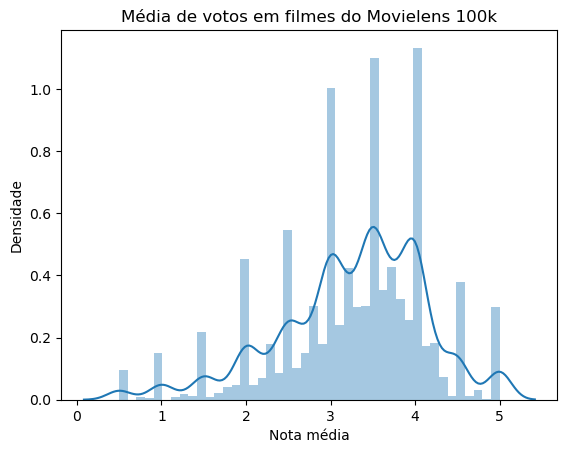

In [34]:
ax = sns.distplot(nota_media.values)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes do Movielens 100k')

In [35]:
quantidade_votos_por_filme = notas.groupby("movieId").count()
filmes_com_pelo_menos_10_votos = quantidade_votos_por_filme.query("rating >=10").index
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593], dtype=int64)

In [36]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media.loc[filmes_com_pelo_menos_10_votos.values]
nota_media_dos_filmes_com_pelo_menos_10_votos

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2269, dtype: float64

C:\Users\matheus.farina\AppData\Local\Temp\ipykernel_16692\3879820392.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)


Text(0.5, 1.0, 'Média de votos em filmes do Movielens 100k com 10 ou mais votos')

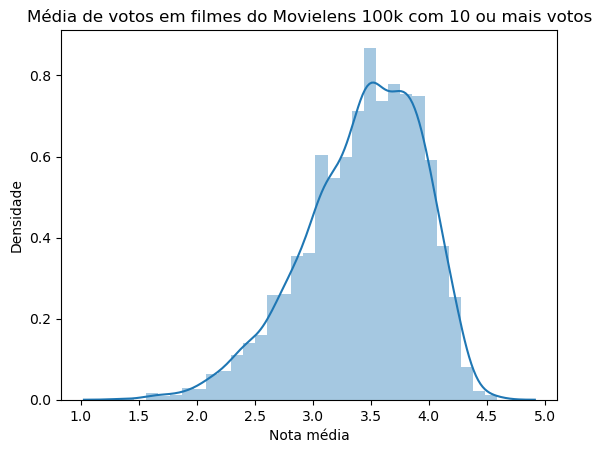

In [37]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes do Movielens 100k com 10 ou mais votos')

Text(0.5, 1.0, 'Média de votos em filmes do Movielens 100k dentre os filmes com 10 ou mais votos')

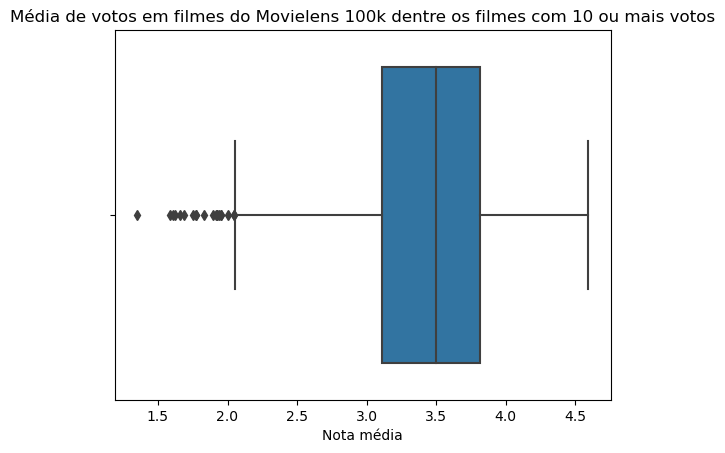

In [38]:
ax = sns.boxplot(x=nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel='Nota média')
ax.set_title('Média de votos em filmes do Movielens 100k dentre os filmes com 10 ou mais votos')

C:\Users\matheus.farina\AppData\Local\Temp\ipykernel_16692\3042753947.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values,


Text(0.5, 1.0, 'Média de votos em filmes do Movielens 100k com 10 ou mais votos')

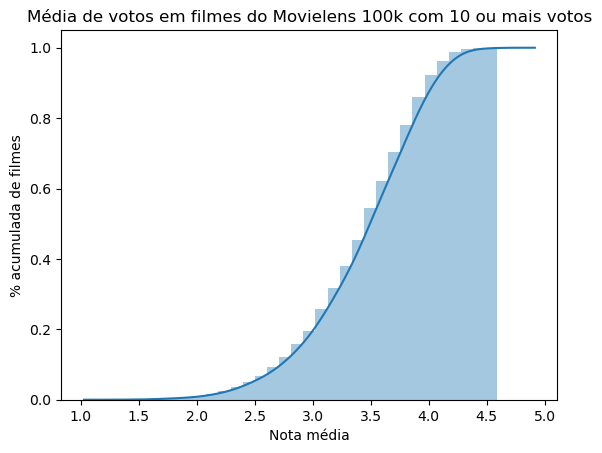

In [39]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values,
                  hist_kws = {'cumulative':True},
                  kde_kws = {'cumulative':True})
ax.set(xlabel='Nota média', ylabel='% acumulada de filmes')
ax.set_title('Média de votos em filmes do Movielens 100k com 10 ou mais votos')

C:\Users\matheus.farina\AppData\Local\Temp\ipykernel_16692\233094032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average,


Text(0.5, 1.0, 'Média de votos em filmes do TMDB 5000 com 10 ou mais votos')

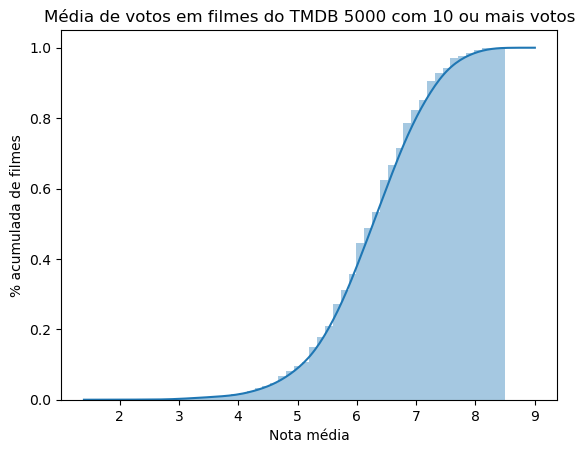

In [40]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average,
                  hist_kws = {'cumulative':True},
                  kde_kws = {'cumulative':True})
ax.set(xlabel='Nota média', ylabel='% acumulada de filmes')
ax.set_title('Média de votos em filmes do TMDB 5000 com 10 ou mais votos')

# Analisando a distribuição dos dados capturados de outros campos do TMDB

C:\Users\matheus.farina\AppData\Local\Temp\ipykernel_16692\314373005.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)


Text(0.5, 1.0, 'Número de votos em filmes do TMDB com 10 ou mais votos')

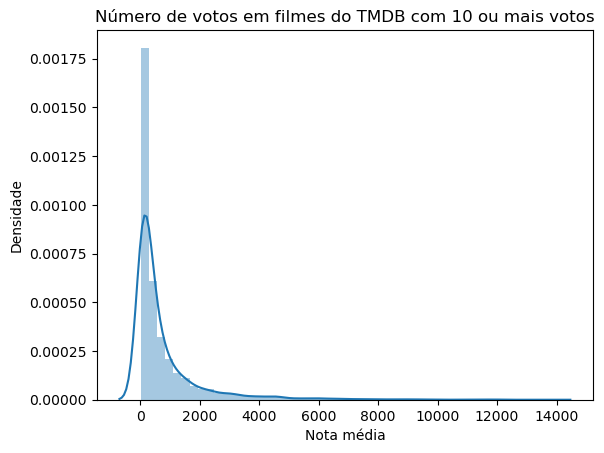

In [41]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Número de votos em filmes do TMDB com 10 ou mais votos')



C:\Users\matheus.farina\AppData\Local\Temp\ipykernel_16692\2994405627.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb.query("budget > 0").budget)


Text(0.5, 1.0, 'Gastos em filmes no TMDB 5000')

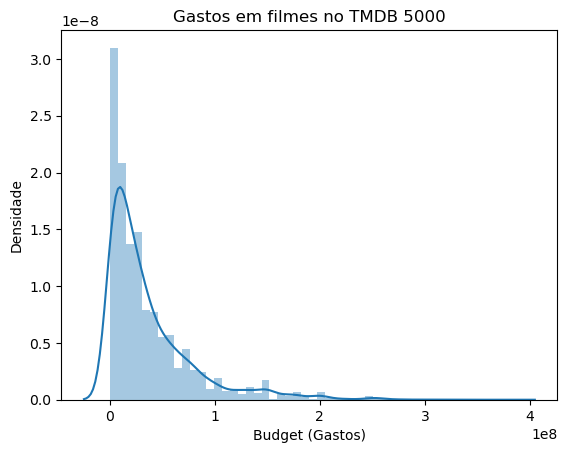

In [42]:
ax = sns.distplot(tmdb.query("budget > 0").budget)
ax.set(xlabel="Budget (Gastos)", ylabel="Densidade")
ax.set_title("Gastos em filmes no TMDB 5000")

C:\Users\matheus.farina\AppData\Local\Temp\ipykernel_16692\2494015071.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb.popularity)


Text(0.5, 1.0, 'Popularidadeem filmes no TMDB 5000')

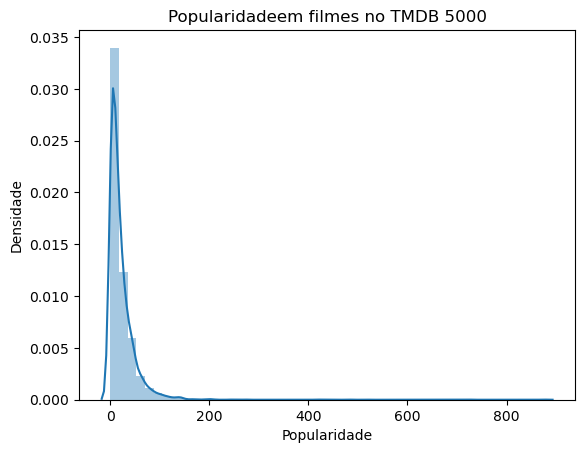

In [43]:
ax = sns.distplot(tmdb.popularity)
ax.set(xlabel="Popularidade", ylabel="Densidade")
ax.set_title("Popularidadeem filmes no TMDB 5000")

C:\Users\matheus.farina\AppData\Local\Temp\ipykernel_16692\1453852195.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb.query("runtime > 0").runtime.dropna())


Text(0.5, 1.0, 'Tempo de Duração em filmes no TMDB 5000')

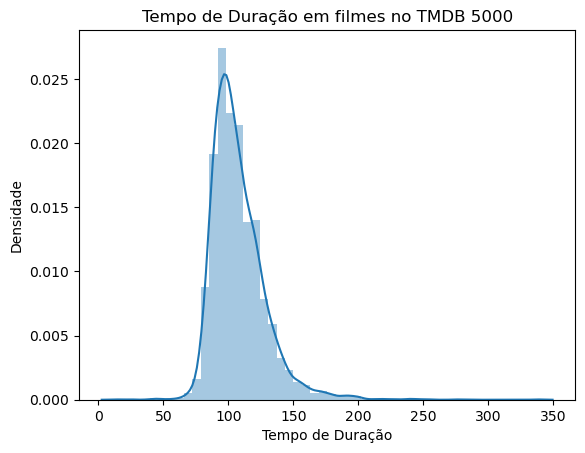

In [44]:
ax = sns.distplot(tmdb.query("runtime > 0").runtime.dropna())
ax.set(xlabel="Tempo de Duração", ylabel="Densidade")
ax.set_title("Tempo de Duração em filmes no TMDB 5000")

C:\Users\matheus.farina\AppData\Local\Temp\ipykernel_16692\2926554316.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb.query("runtime > 0").runtime.dropna(),


Text(0.5, 1.0, 'Tempo de Duração em filmes no TMDB 5000')

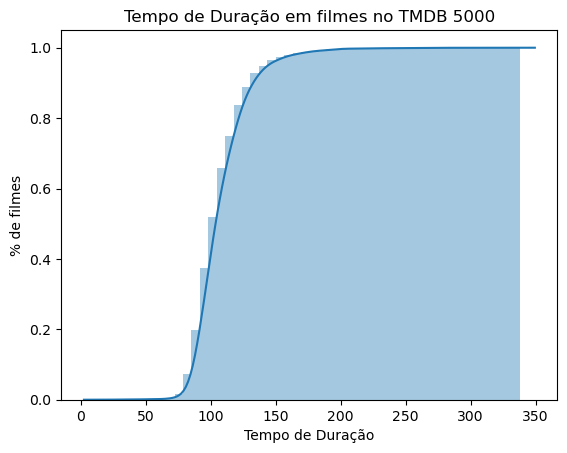

In [45]:
ax = sns.distplot(tmdb.query("runtime > 0").runtime.dropna(),
                 hist_kws={'cumulative':True},
                 kde_kws={'cumulative':True}
                 )
ax.set(xlabel="Tempo de Duração", ylabel="% de filmes")
ax.set_title("Tempo de Duração em filmes no TMDB 5000")

In [46]:
tmdb.query("runtime > 0").runtime.dropna().quantile(0.8)

121.0

# Movielens: Média dos filmes com pelo menos 10 votos

In [47]:
print("Média dos filmes com pelo menos 10 votos" ,nota_media_dos_filmes_com_pelo_menos_10_votos.mean())

Média dos filmes com pelo menos 10 votos 3.4320503405352594


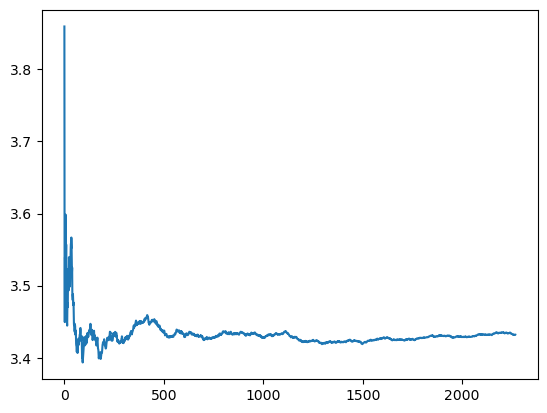

In [48]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

medias = [temp.iloc[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

In [49]:
zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

In [50]:
descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)

In [51]:
descr_todos_com_10_votos.tconfint_mean()

(3.41123483922938, 3.4528658418411386)

# Vamos ver o filme 1...

In [53]:
filmes = pd.read_csv("dados/movies.csv")
filmes.query("movieId==1")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [54]:
notas1 = notas.query("movieId ==1")
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


C:\Users\matheus.farina\AppData\Local\Temp\ipykernel_16692\2840911523.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(notas1.rating)


Text(0.5, 1.0, 'Nota para Toy Story')

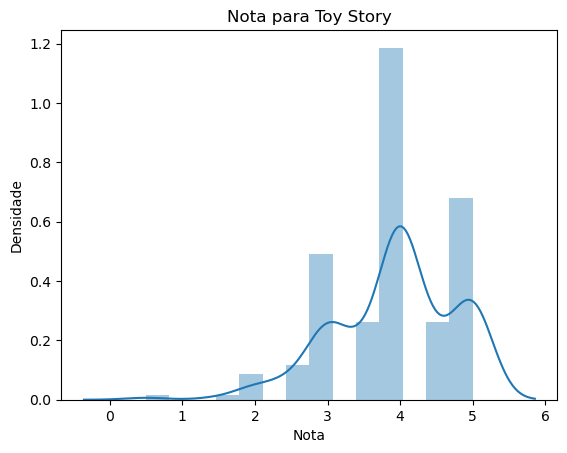

In [56]:
ax = sns.distplot(notas1.rating)
ax.set(xlabel="Nota", ylabel="Densidade")
ax.set_title("Nota para Toy Story")

Text(0.5, 1.0, 'Distribuição de Notas para Toy Story')

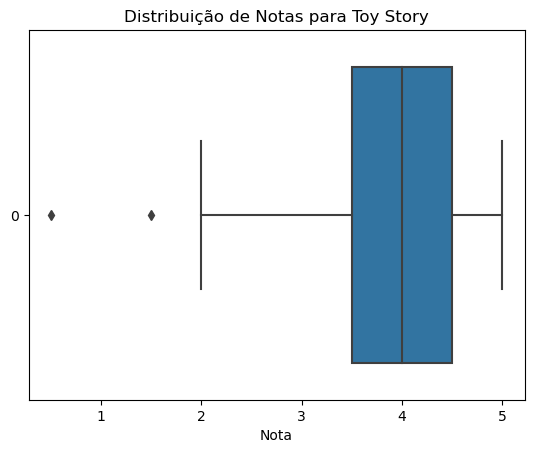

In [59]:
ax = sns.boxplot(notas1.rating, orient="h")
ax.set(xlabel="Nota",)
ax.set_title("Distribuição de Notas para Toy Story")

In [61]:
notas1.rating.mean()

3.9209302325581397

In [63]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [66]:
ztest(notas1.rating, value=3.4320503405)

(8.586342306536002, 8.978190353515212e-18)

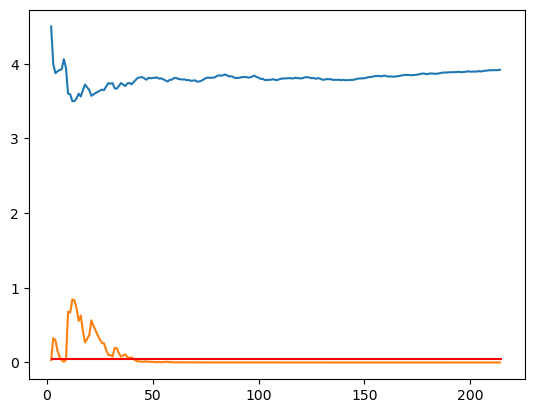

In [88]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
    media = temp[0:i].mean()
    stat, p = ztest(temp[0:i], value = 3.4320503405352594)
    return (i, media, p)
    
valores = np.array([calcula_teste(i) for i in range(2, len(temp))])

plt.plot(valores[:,0],valores[:,1])
plt.plot(valores[:,0],valores[:,2])
plt.hlines(y=0.05, xmin=2, xmax=len(temp), colors='r')

# Comparação de dois conjuntos de amostras

In [91]:
print (ztest(notas.rating, notas1.rating))
zconfint(notas.rating, notas1.rating)

(-5.894327101501841, 3.762112778881965e-09)


(-0.5588219849631111, -0.2799245129192442)

In [97]:
ttest_ind(notas.rating, notas1.rating)


Ttest_indResult(statistic=-5.894327101501841, pvalue=3.774003138720876e-09)

In [104]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)

In [105]:
comparacao